In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

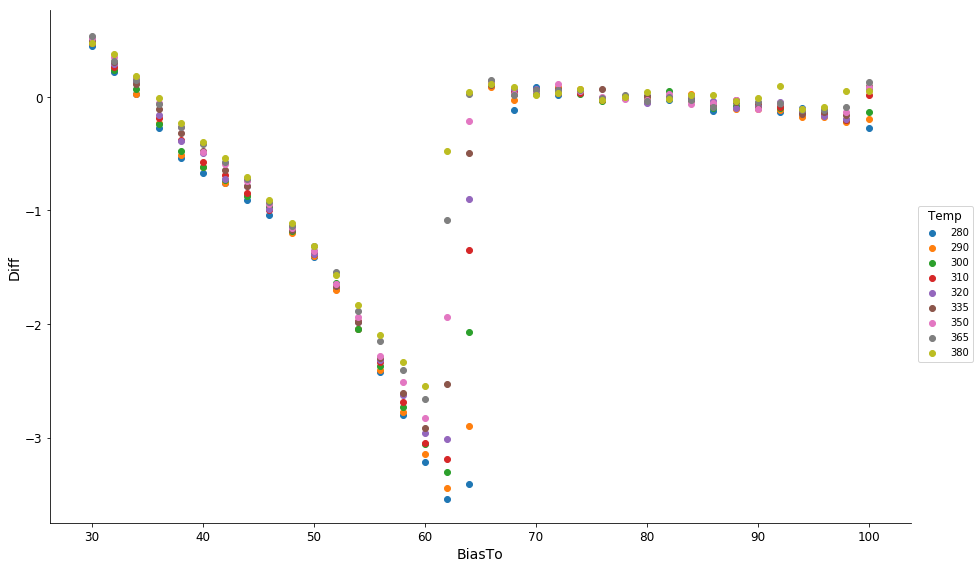

In [63]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/seventh/force_0.04_rg_0.1_lipid_0.5_mem_1_go_0.8_enhance/rerun_0_01_May_234419.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

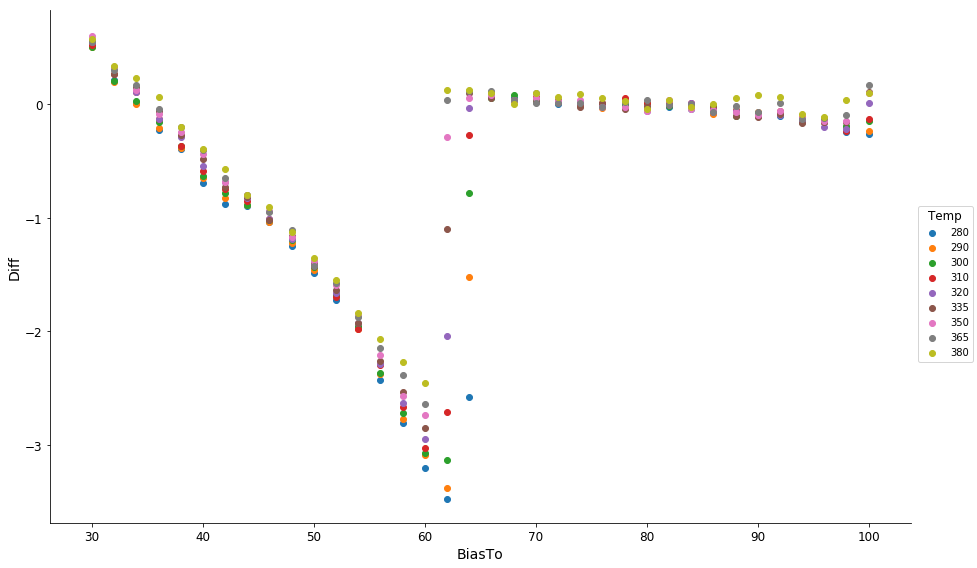

In [4]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/seventh/force_0.04_rg_0.1_lipid_0.5_mem_1_go_0.8_enhance/rerun_1_01_May_234419.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [18]:
rerun1["BiasTo"] = rerun1["BiasTo"].apply(pd.to_numeric)

BiasTo
30.0     AxesSubplot(0.125,0.125;0.775x0.755)
32.0     AxesSubplot(0.125,0.125;0.775x0.755)
34.0     AxesSubplot(0.125,0.125;0.775x0.755)
36.0     AxesSubplot(0.125,0.125;0.775x0.755)
38.0     AxesSubplot(0.125,0.125;0.775x0.755)
40.0     AxesSubplot(0.125,0.125;0.775x0.755)
42.0     AxesSubplot(0.125,0.125;0.775x0.755)
44.0     AxesSubplot(0.125,0.125;0.775x0.755)
46.0     AxesSubplot(0.125,0.125;0.775x0.755)
48.0     AxesSubplot(0.125,0.125;0.775x0.755)
50.0     AxesSubplot(0.125,0.125;0.775x0.755)
52.0     AxesSubplot(0.125,0.125;0.775x0.755)
54.0     AxesSubplot(0.125,0.125;0.775x0.755)
56.0     AxesSubplot(0.125,0.125;0.775x0.755)
58.0     AxesSubplot(0.125,0.125;0.775x0.755)
60.0     AxesSubplot(0.125,0.125;0.775x0.755)
62.0     AxesSubplot(0.125,0.125;0.775x0.755)
64.0     AxesSubplot(0.125,0.125;0.775x0.755)
66.0     AxesSubplot(0.125,0.125;0.775x0.755)
68.0     AxesSubplot(0.125,0.125;0.775x0.755)
70.0     AxesSubplot(0.125,0.125;0.775x0.755)
72.0     AxesSubplot(0.125,

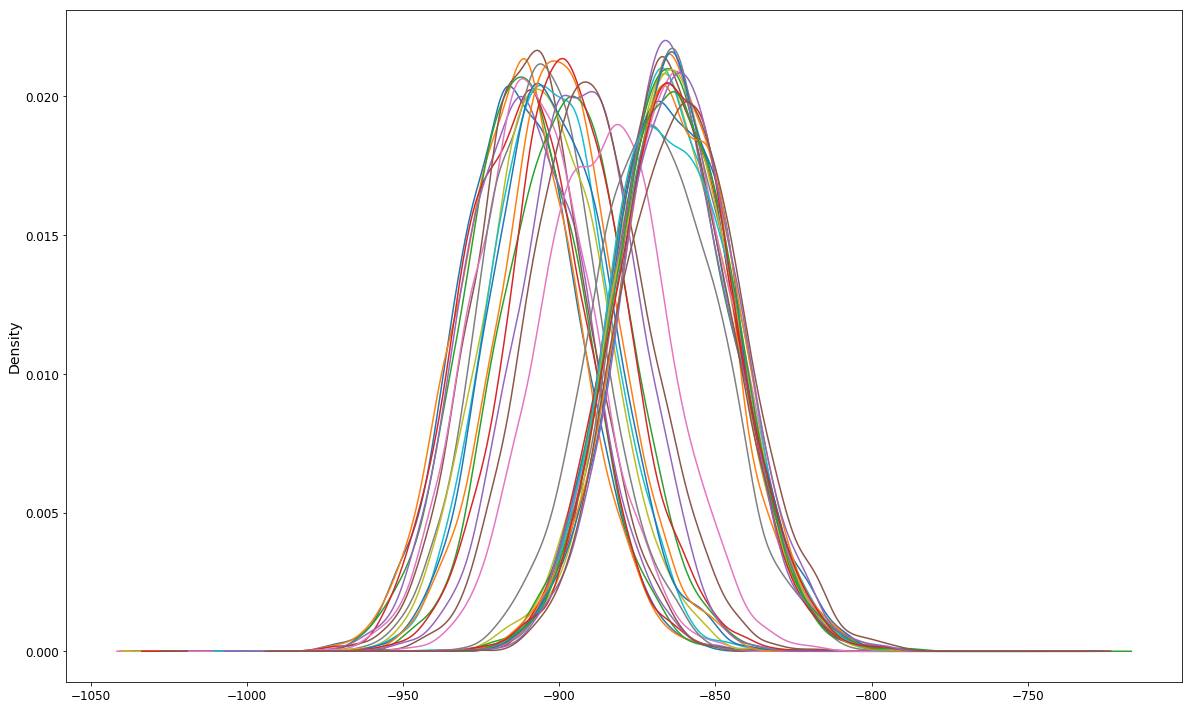

In [29]:
rerun1.query("Temp == 300").groupby(["BiasTo"])["TotalE"].plot.kde(figsize=(20,12.36))
# plt.legend()

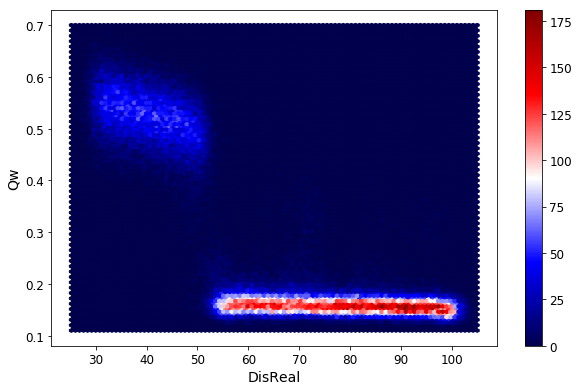

In [52]:
rerun1.query("Temp == 440").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

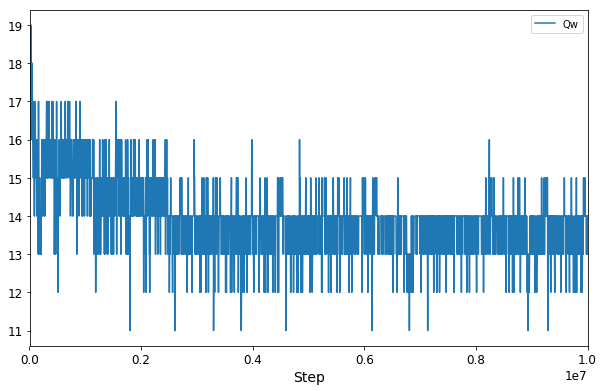

In [64]:
rerun0.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

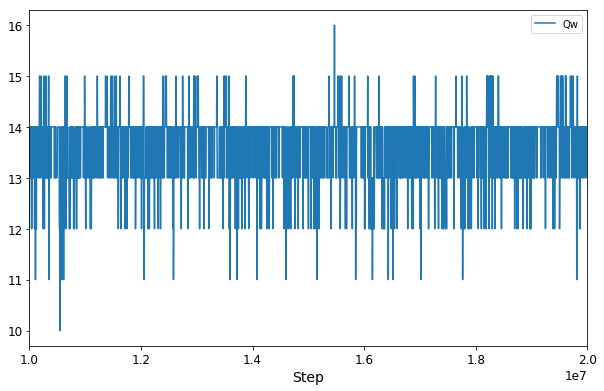

In [61]:
rerun1.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

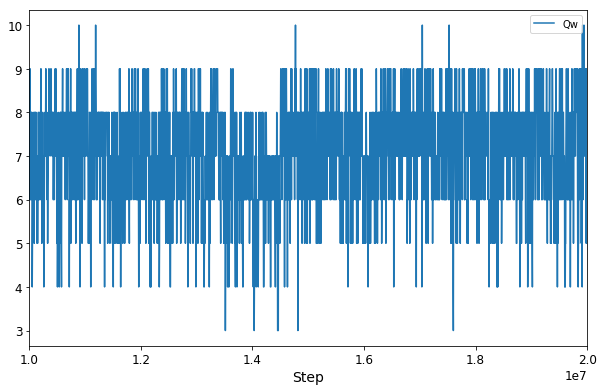

In [65]:
rerun1.query("Temp == 470 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

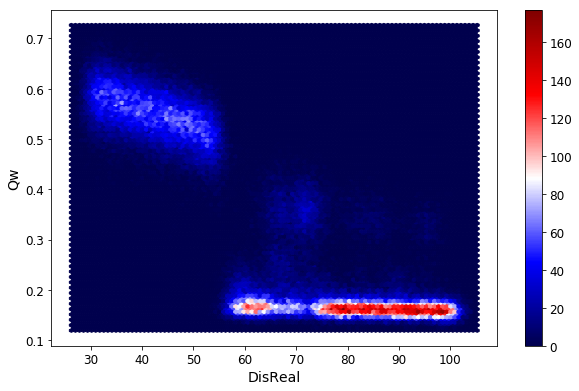

In [9]:
rerun1.query("Temp == 410").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

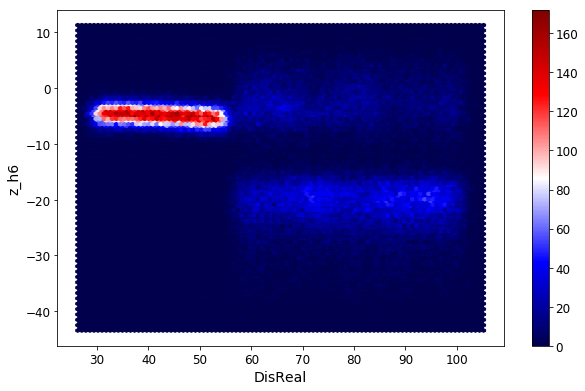

In [10]:
rerun1.query("Temp == 410").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

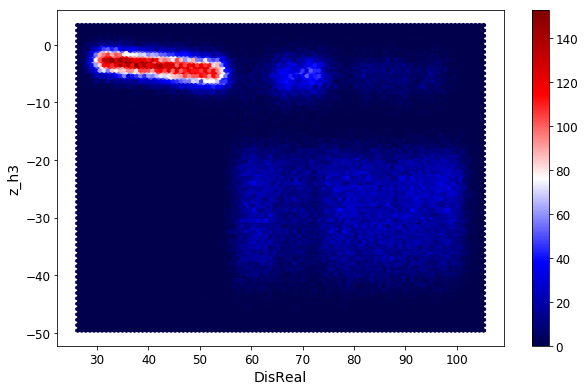

In [11]:
rerun1.query("Temp == 410").plot.hexbin("DisReal", "z_h3", cmap="seismic", sharex=False)

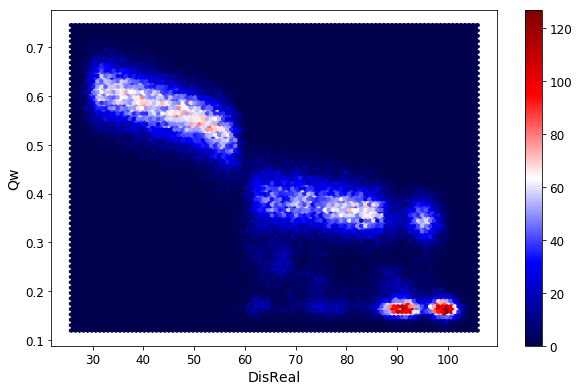

In [7]:
rerun1.query("Temp == 380").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

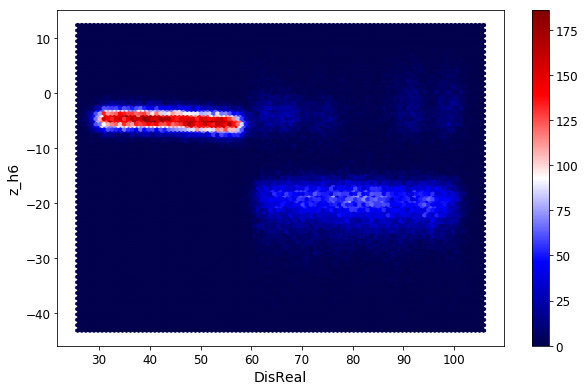

In [8]:
rerun1.query("Temp == 380").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

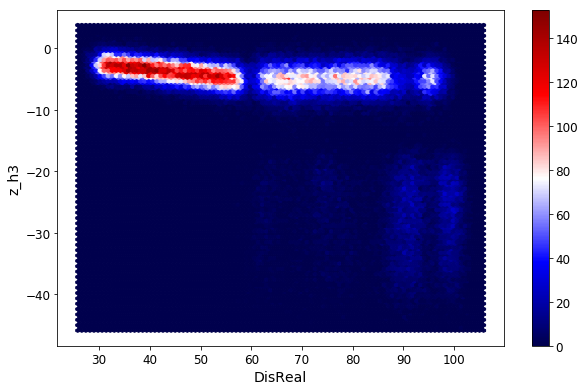

In [12]:
rerun1.query("Temp == 380").plot.hexbin("DisReal", "z_h3", cmap="seismic", sharex=False)

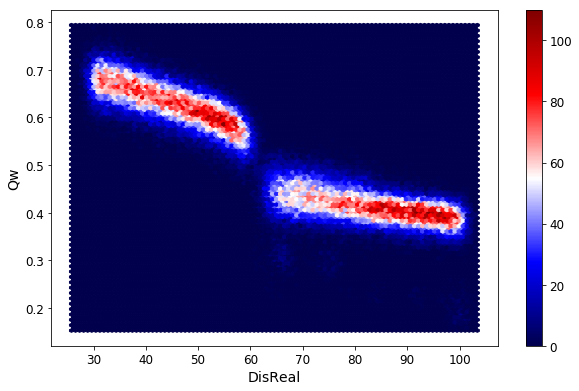

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

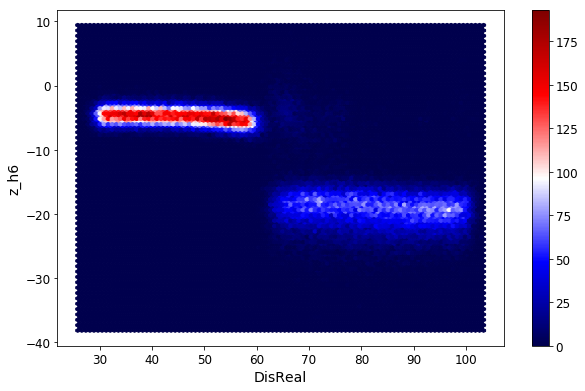

In [4]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

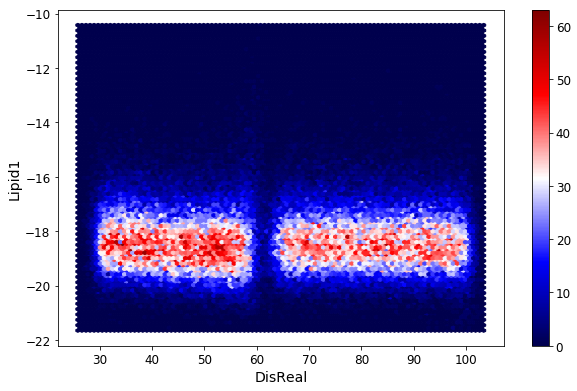

In [5]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Lipid1", cmap="seismic", sharex=False)

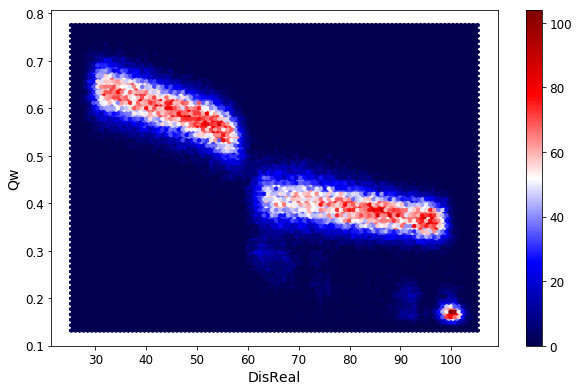

In [7]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

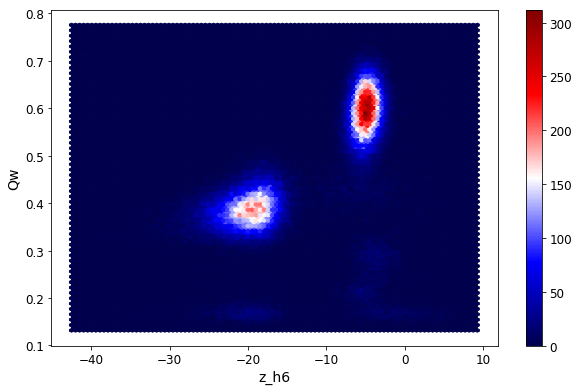

In [33]:
rerun1.query("Temp == 350").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

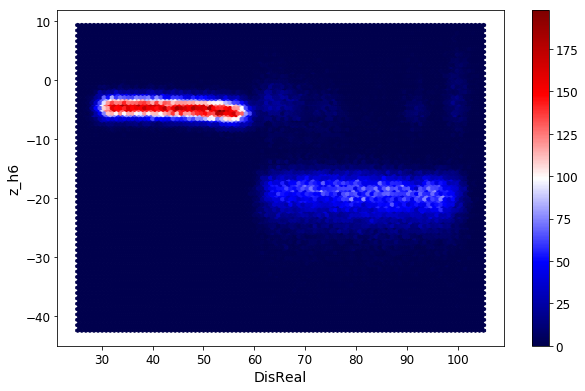

In [9]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

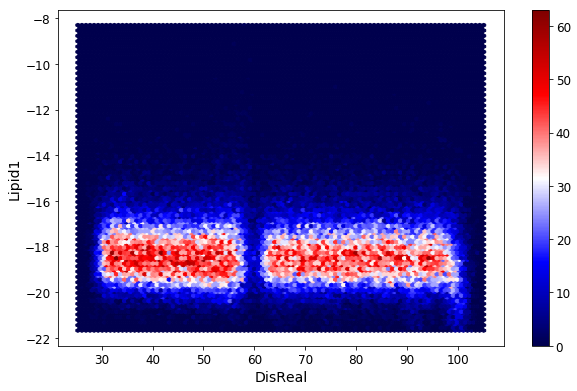

In [8]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "Lipid1", cmap="seismic", sharex=False)

In [11]:
data = pd.concat([rerun0, rerun1])

In [14]:
chosen = data.query("BiasTo == '70.0' and Run == 5")

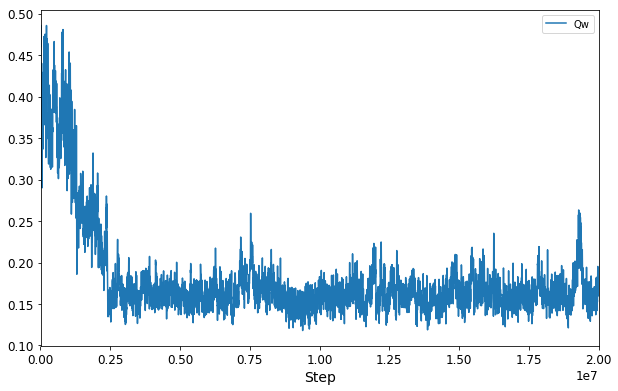

In [16]:
chosen.plot("Step", "Qw")

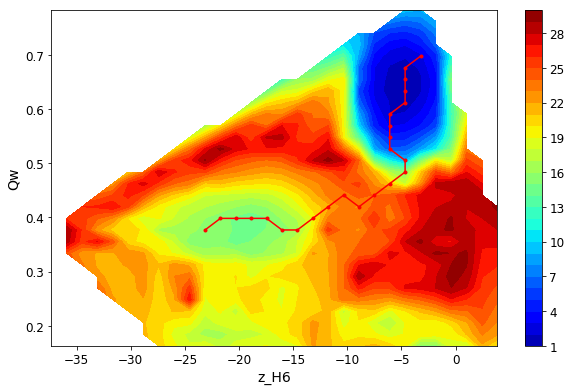

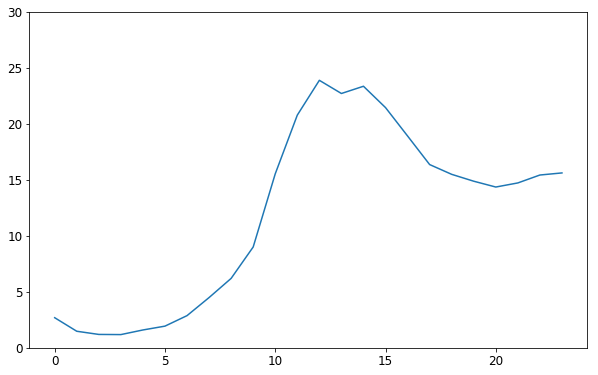

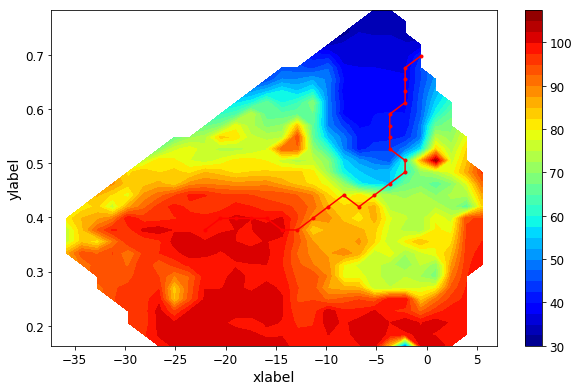

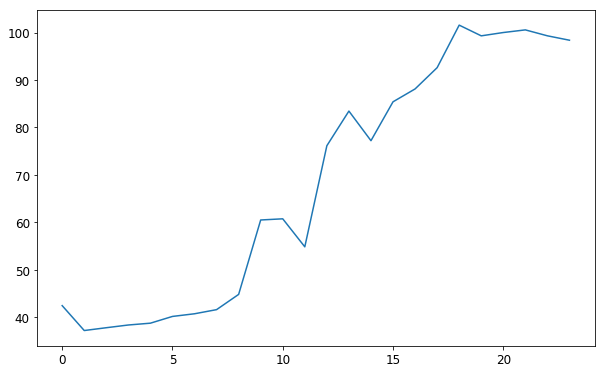

In [71]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 310
location = pre + "/seventh/_280-350/2d_z_qw/temp_300_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

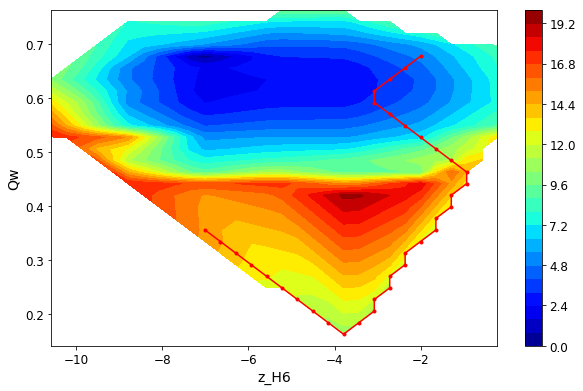

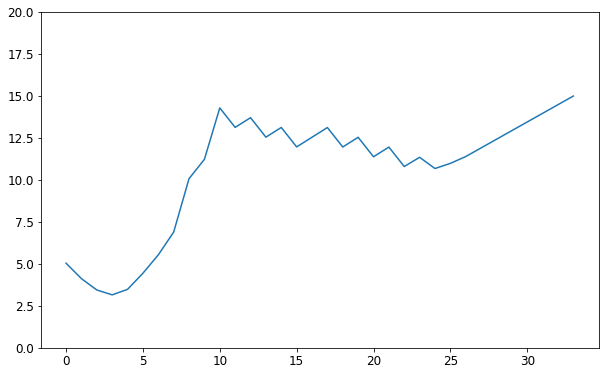

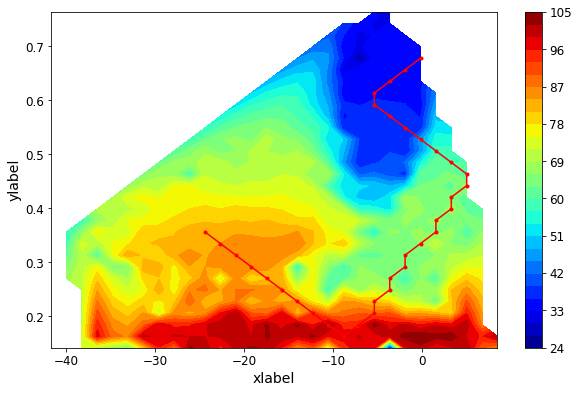

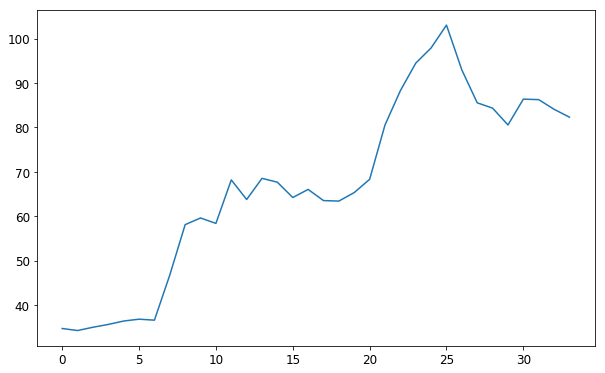

In [53]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/zero_energy/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

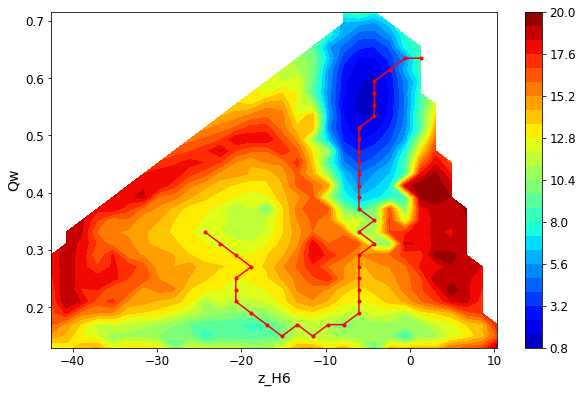

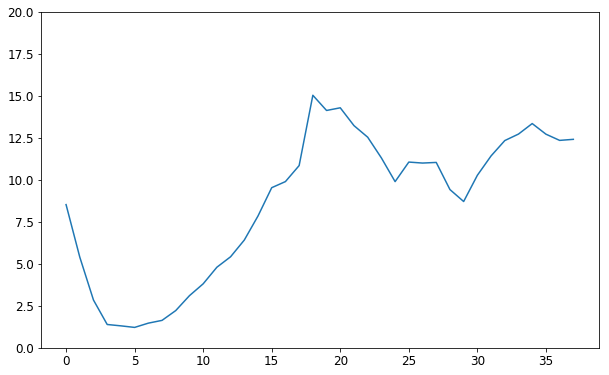

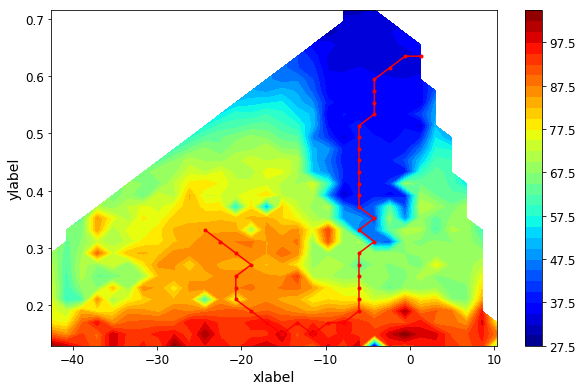

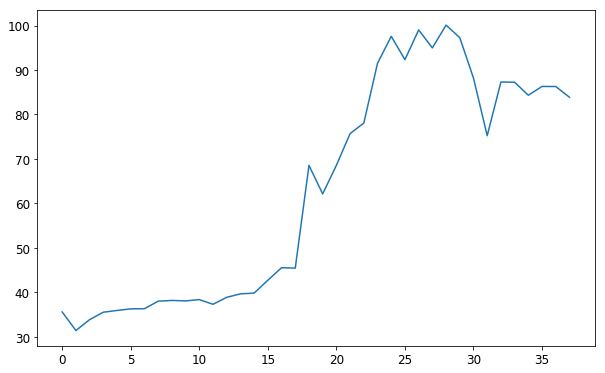

In [51]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 410
location = pre + "/seventh/_280-350/2d_z_qw/temp_410/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

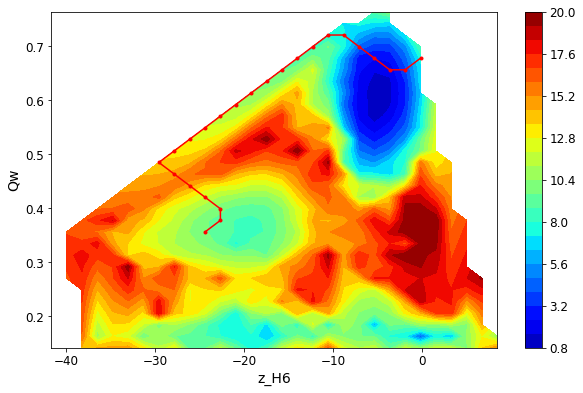

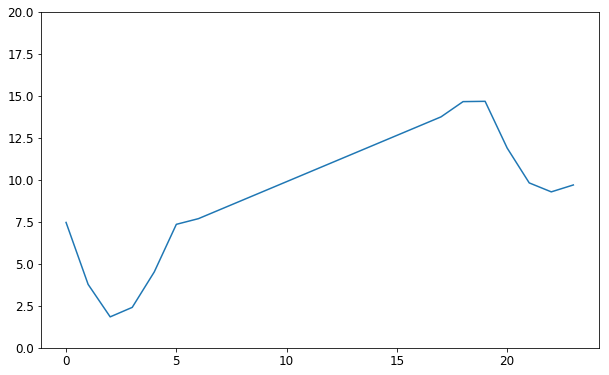

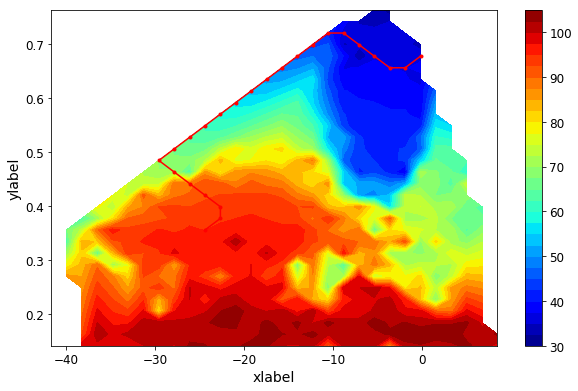

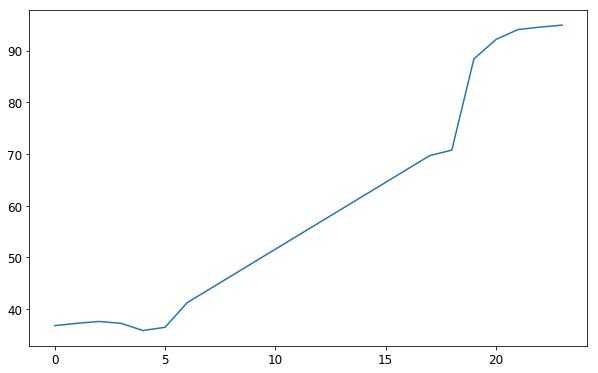

In [72]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/quick_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

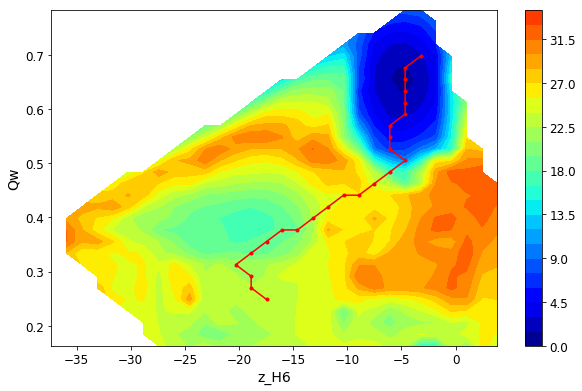

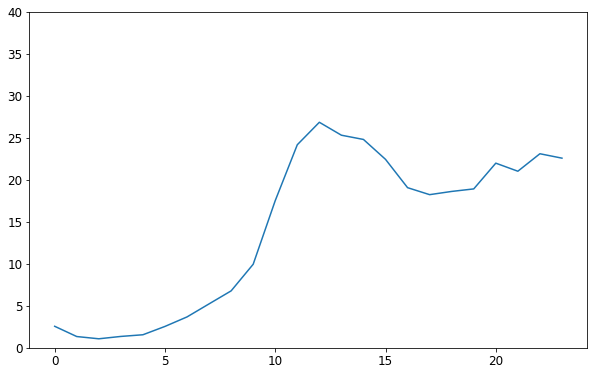

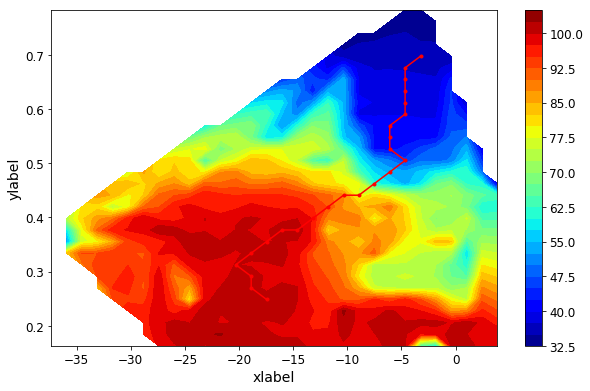

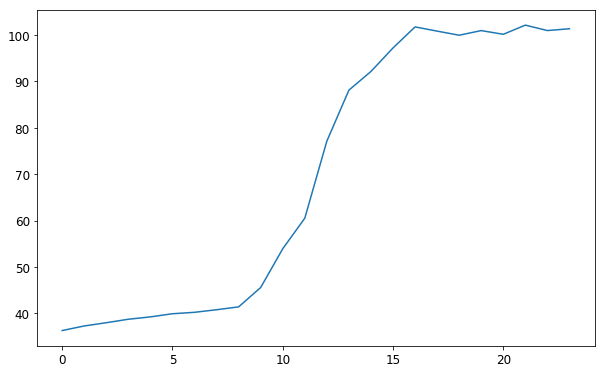

In [39]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 300
location = pre + "/seventh/_280-350/2d_z_qw/change_k/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

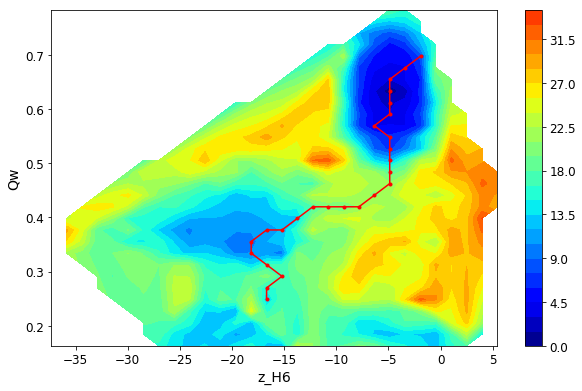

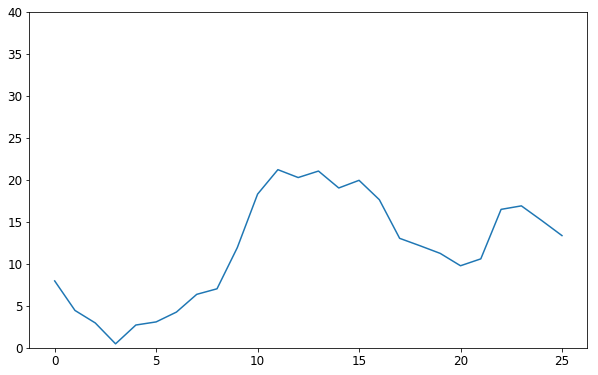

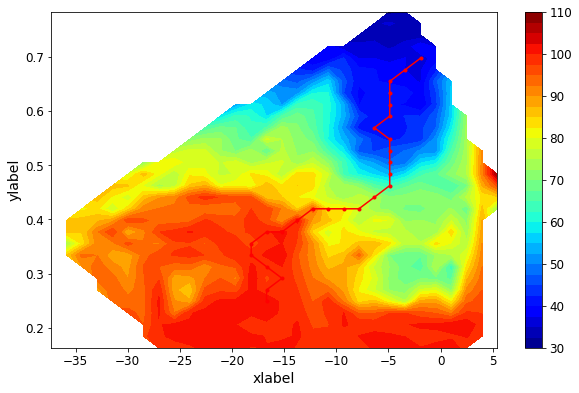

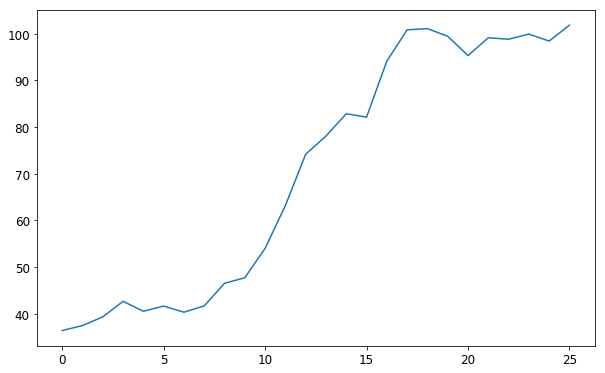

In [37]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 340
location = pre + "/seventh/_280-350/2d_z_qw/change_k/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

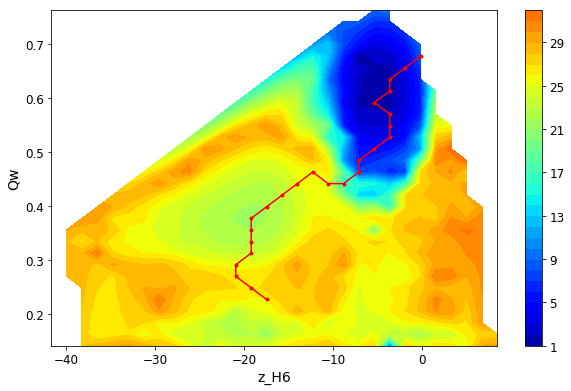

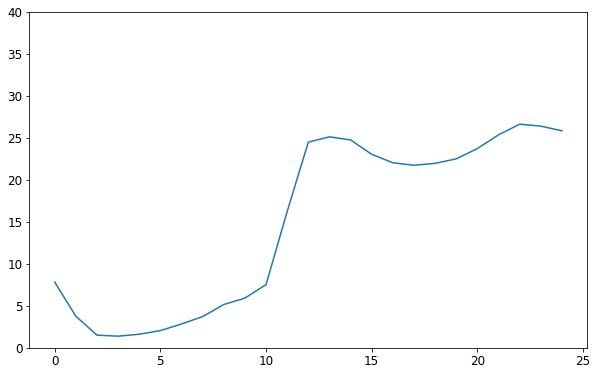

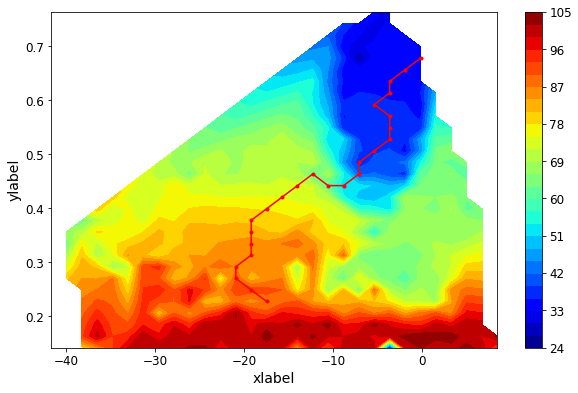

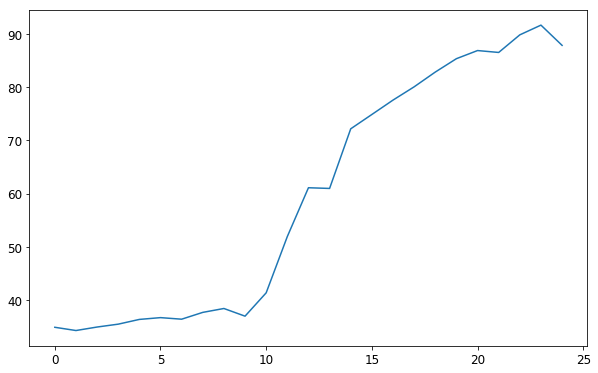

In [49]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 360
location = pre + "/seventh/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

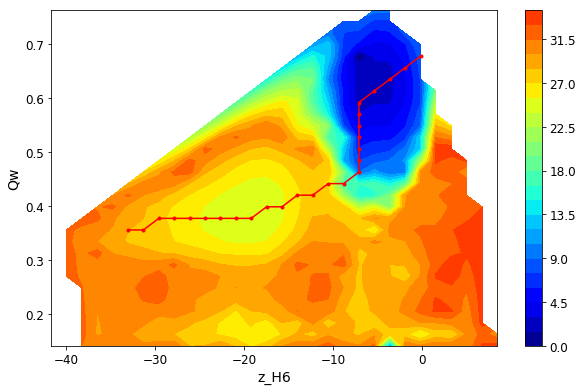

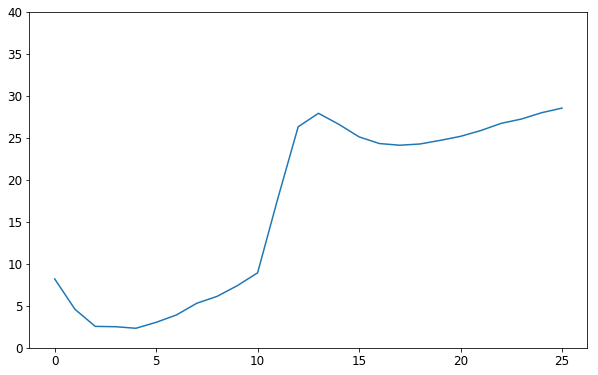

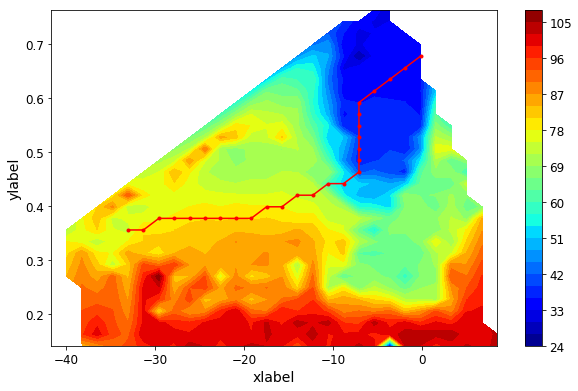

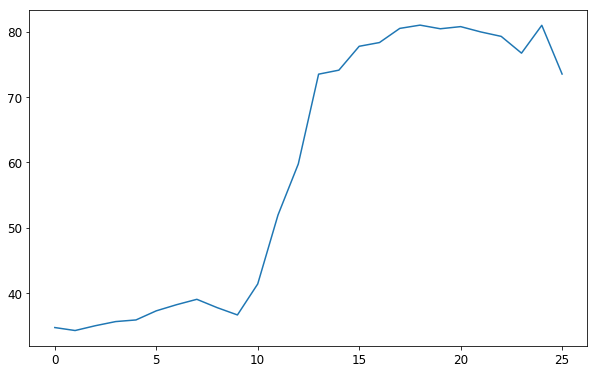

In [34]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/small_energy/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 5), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

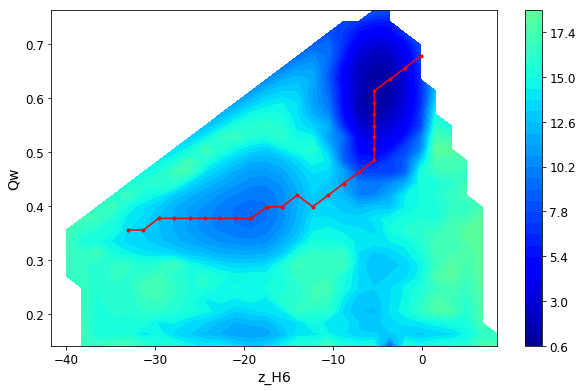

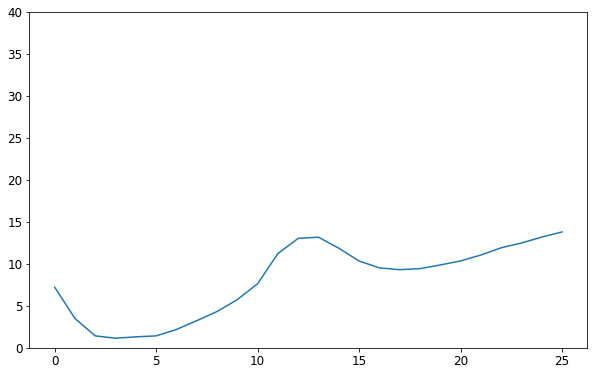

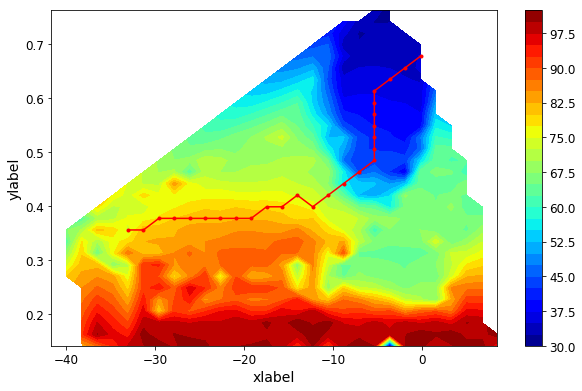

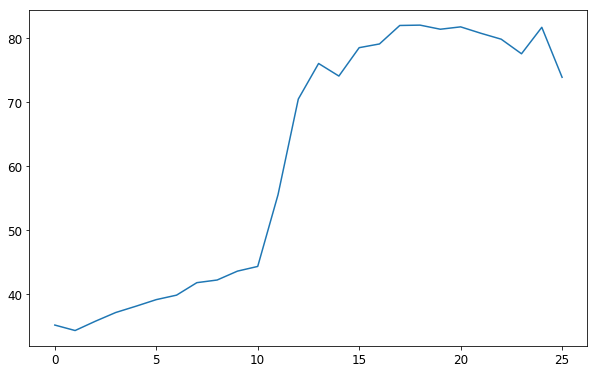

In [31]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/change_k_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 5), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

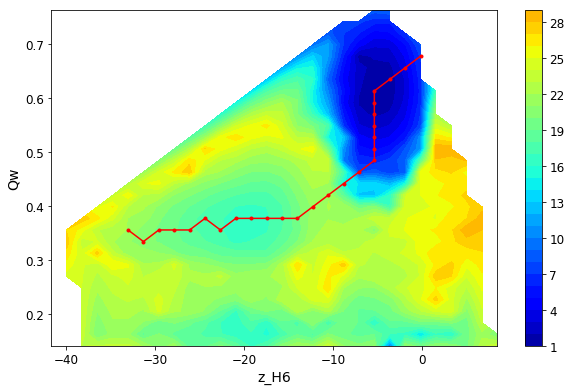

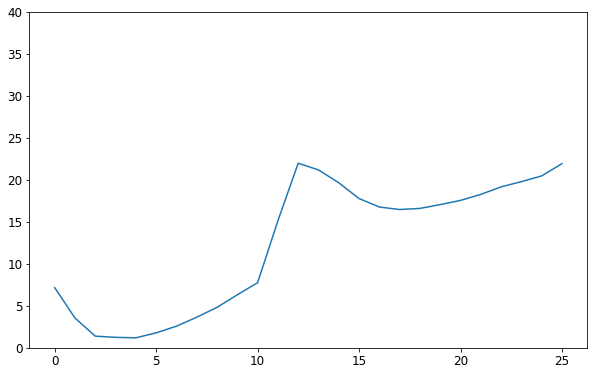

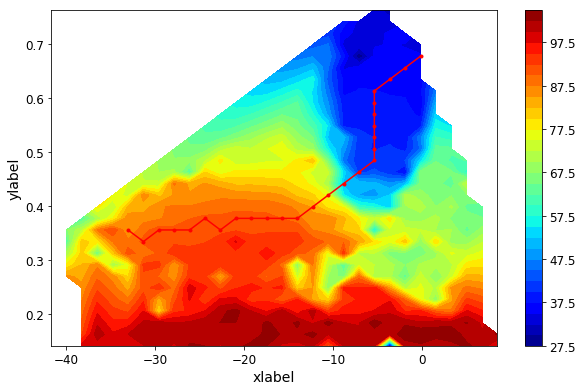

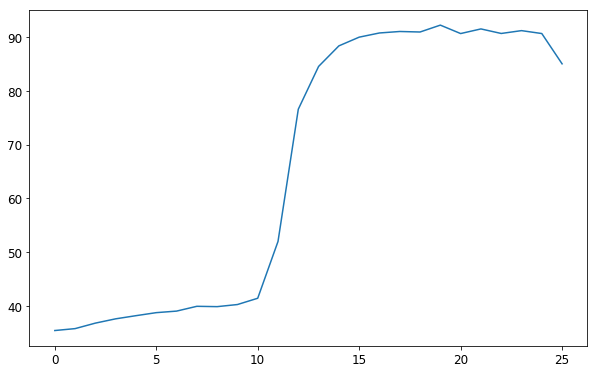

In [40]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/temp_350_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 5), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

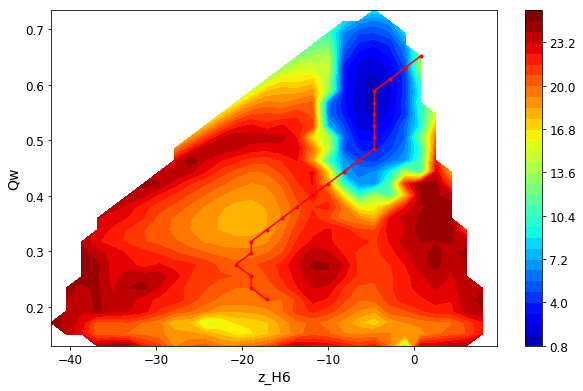

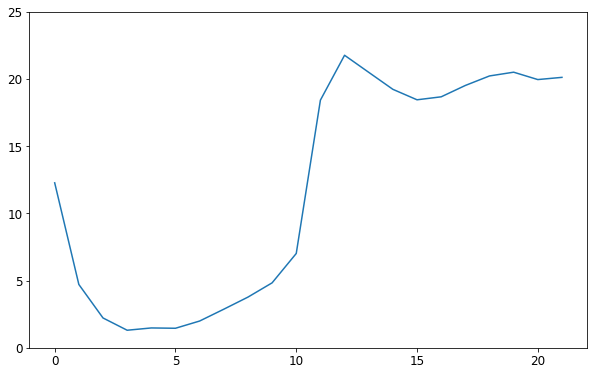

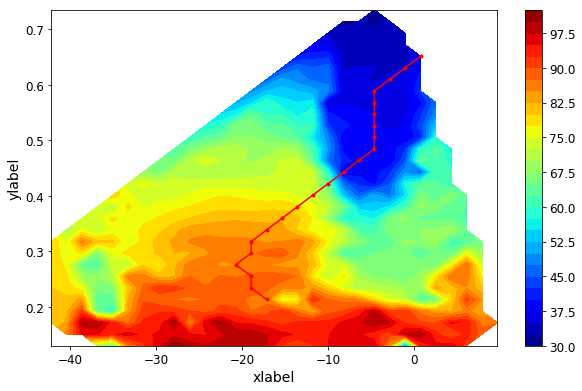

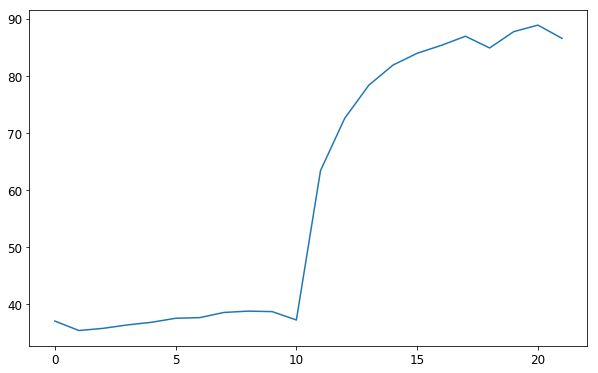

In [50]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 390
location = pre + "/seventh/_280-350/2d_z_qw/temp_380/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=25)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

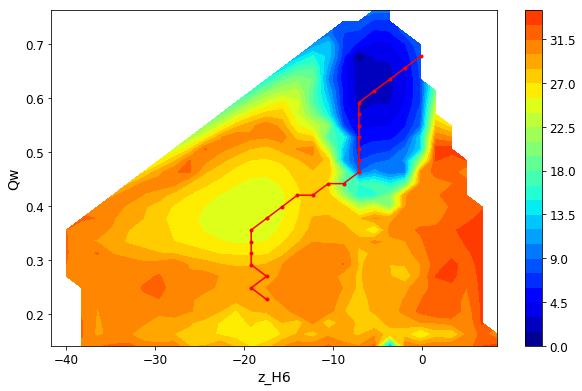

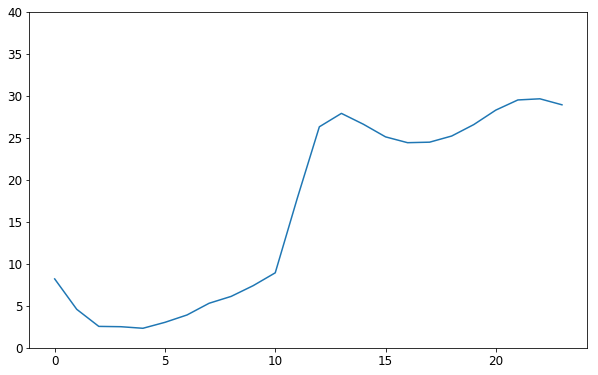

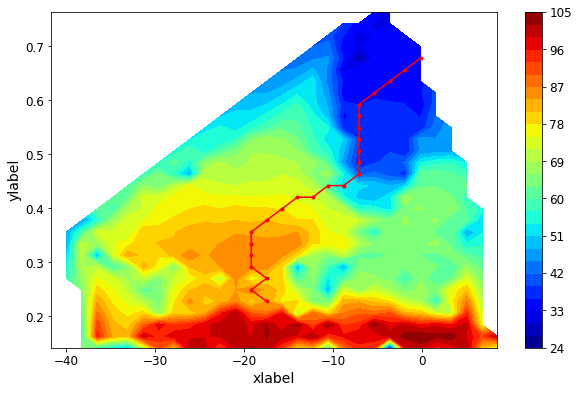

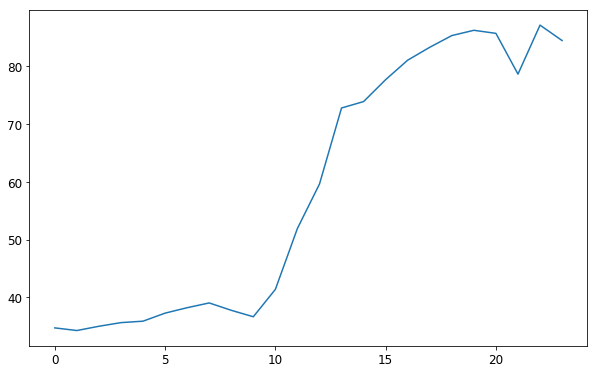

In [66]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

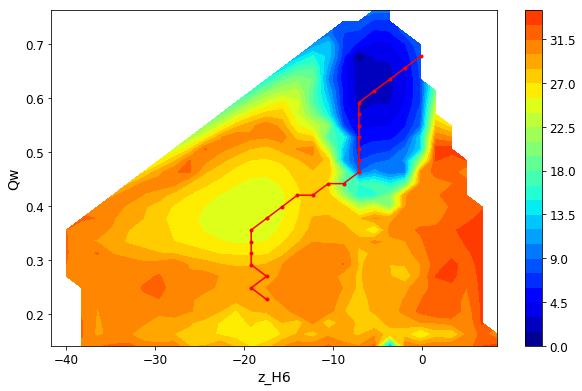

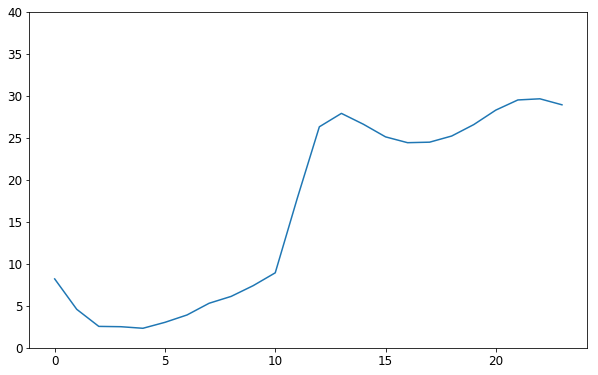

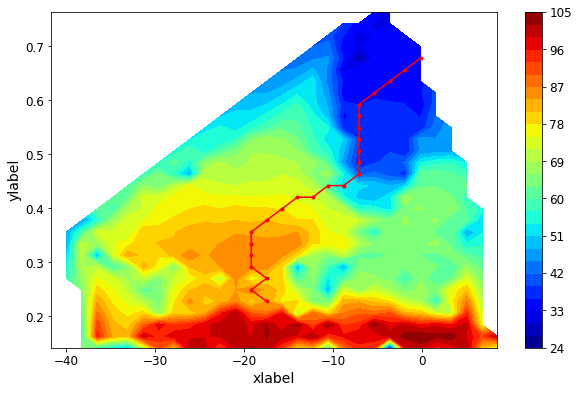

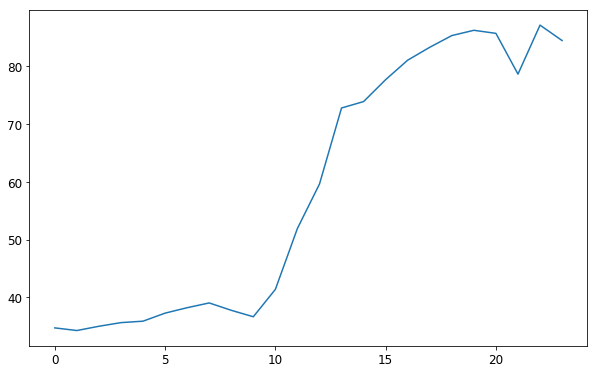

In [17]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/seventh/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)